In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [50]:
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['text.usetex'] = False

In [57]:
def load_Arrays(iteration: int, set_array='NN'):
    """
    Utility function responsible for loading arrays

    Args:
        iteration (int): array iteration number
        set_array (str): select which array to load - KK/NN
    Returns:
        ndarray: BER obtained in previous simulations
    """
    with open(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/BER_'+str(set_array)+'_'+str(iteration)+'.npy', 'rb') as f:
        BER_NN = np.load(f)
    return BER_NN

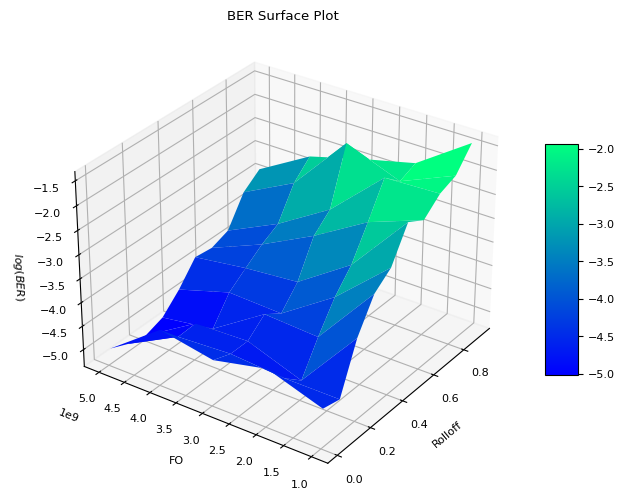

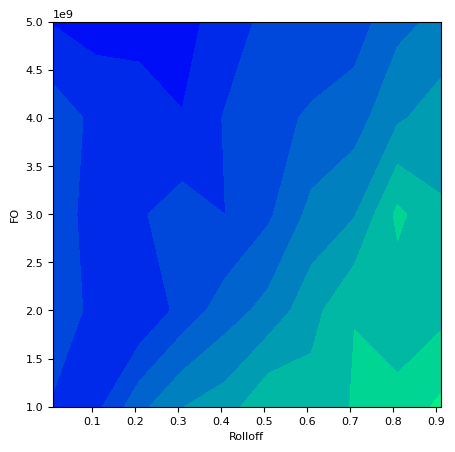

In [79]:
# calculates the average of BER arrays
BER_NN = np.mean(np.array([load_Arrays(0), load_Arrays(1), load_Arrays(2), load_Arrays(3), load_Arrays(4)]), axis=0)

x = np.arange(0.01, 0.99, 0.1)
y = np.arange(1e9, 6e9, 1e9)

x, y = np.meshgrid(x, y)
z = np.log10(BER_NN)  # shape((5, 10))

fig = plt.figure(figsize=(8, 6))
ax =  plt.axes(projection='3d')

fig = plt.figure(figsize=(5, 5))
plt.contourf(x, y, z, cmap=cm.winter)
plt.xlabel('Rolloff')
plt.ylabel('FO')
plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_ModelPerformanceContourf_64QAM.png', dpi=600)

surf = ax.plot_surface(x, y, z, cmap=cm.winter, linewidth=1, antialiased=True, edgecolor='None')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=7)
ax.set_xlabel('Rolloff')
ax.set_ylabel('FO')
ax.set_zlabel(r'$log(BER)$')
ax.set_title('BER Surface Plot')
ax.view_init(elev=30, azim=215)

plt.savefig(r'C:/Users/Silas/Documents/PIVIC-Comunicacoes-Opticas/resultados/Figuras/results_ModelPerformance_64QAM_Mean.png', dpi=600)

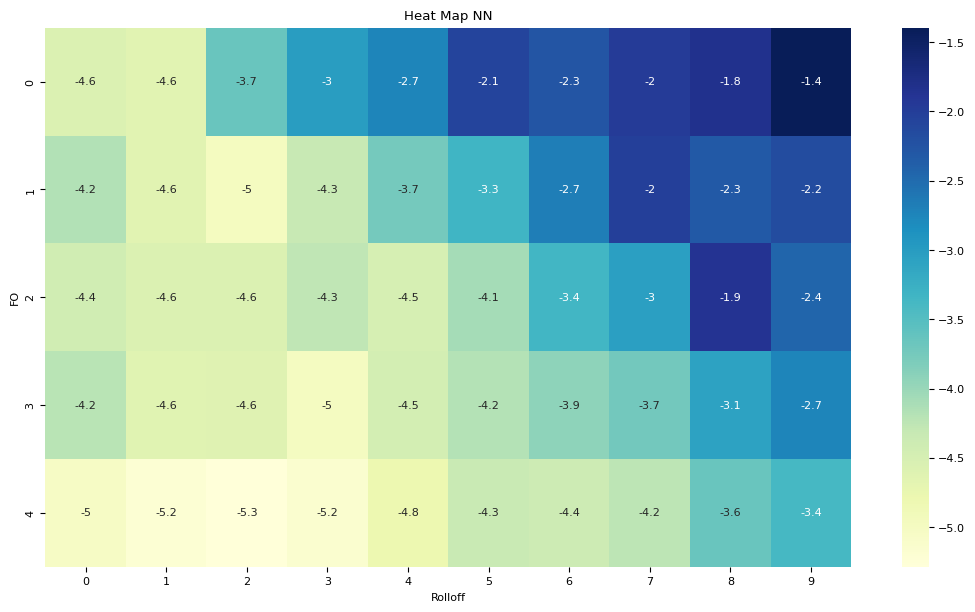

In [78]:
fig = plt.figure(figsize=(13, 7))
heatMap = sns.heatmap(np.log10(BER_NN), annot=True, cmap='YlGnBu')
heatMap.set(xlabel='Rolloff', ylabel='FO', title='Heat Map NN');